# Data Scientist Associate Practical Exam Submission

# Background
You are working as a data scientist at a local University. The university started offering online courses to reach a wider range of students. The university wants you to help them understand enrollment trends. They would like you to identify what contributes to higher enrollment. In particular, whethert the course type (online or classroom) is a factor.

In [1]:
# Import required libraries and read csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

df = pd.read_csv("university_enrollment_2306.csv")

In [2]:
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


In [3]:
df.shape

(1850, 8)

# Task 1

In [4]:
# This code performs data cleaning and preprocessing tasks on a DataFrame called 'df'.

# Function to check if 'course_id' column is a unique identifier
def unique_column(df):
    if df['course_id'].nunique() == df.shape[0]:
        return True
    else:
        return False

# Function to count missing values in a specified column
def missing(column):
    return df[column].isna().sum()

# Check if 'course_id' is a unique identifier and count missing values
print('The course_id column is a unique identifier of the course (True/False):', unique_column(df))
print('Number of missing values in the course_id column is:', df['course_id'].isna().sum())
print('#'*94)

# Processing 'course_type' column
unique_course_type = df['course_type'].unique()  # Get unique values
na_course_type = missing('course_type')  # Count missing values
df.course_type.fillna('classroom', inplace=True)  # Fill missing values with 'classroom'
df.loc[df.course_type=='-', 'course_type'] = 'classroom'  # Replace '-' values with 'classroom'

# Display unique values and count of unique values for 'course_type'
print(f'Unique values of course_type column are {unique_course_type[0]} and {unique_course_type[1]}.')
print(f'Number of unique values of course_type column equals {na_course_type}.')
print('#'*94)

# Processing 'year' column
# This column contains discrete values
discrete_year = df['year'].describe()  # Generate statistics
unique_year = df['year'].unique()  # Get unique values
min_year = unique_year.min()  # Find the minimum year
max_year = unique_year.max()  # Find the maximum year

# Handle missing values in 'year' column by filling with 2011
na_year = missing('year')  # Count missing values
df.year.fillna(2011, inplace=True)
df.loc[df.year=='-', 'year'] = 2011

# Check if there are no missing values in 'year' column
boolean = na_year == 0

# Display statistics and missing value information for 'year'
print(discrete_year)
print('#'*94)
print('There are no missing values:', boolean)
print(f'Number of missing values is in the year column {na_year}.')
print('#'*94)

# Processing 'enrollment_count' column
# This column contains discrete values
discrete_enrollment_count = df['enrollment_count'].describe()  # Generate statistics

# Handle missing and '-' values in 'enrollment_count' column by filling with 0
na_enrollment_count = missing('enrollment_count')  # Count missing values
df.loc[df.enrollment_count=='-', 'enrollment_count'] = 0
df.enrollment_count.fillna(0, inplace=True)
df.loc[df.year=='-', 'enrollment_count'] = 0

# Display statistics and missing value information for 'enrollment_count'
print(discrete_enrollment_count)
print('#'*94)
print(f'Number of missing values is in the enrollment_count column {na_enrollment_count}.')
print('#'*94)

# Processing 'pre_score' column
# This column contains continuous values
cont_pre_score = df['pre_score'].describe()  # Generate statistics


# Handle missing and '-' values in 'pre_score' column by filling with 0
df.pre_score.fillna(0, inplace=True)
df.loc[df.pre_score=='-', 'pre_score'] = 0
na_pre_score = missing('pre_score')  # Count missing values

# Display statistics and missing value information for 'pre_score'
print(f'Number of missing values is in the pre_score column {na_pre_score}.')
print('#'*94)

# Processing 'post_score' column
# This column contains continuous values
cont_post_score = df['post_score'].describe()  # Generate statistics

# Handle missing and '-' values in 'post_score' column by filling with 0
df.post_score.fillna(0, inplace=True)
df.loc[df.post_score=='-', 'post_score'] = 0
na_post_score = missing('post_score')  # Count missing values

# Replace missing values with 0 in 'post_score' column
df['post_score'].fillna(0, inplace=True)

# Display statistics and missing value information for 'post_score'
print(f'Number of missing values is in the post_score column {na_post_score}.')
print('#'*94)

# Processing 'pre_requirement' column
unique_pre_requirement = df['pre_requirement'].unique()  # Get unique values
df.pre_requirement.fillna('None', inplace=True)  # Fill missing values with 'None'
df.loc[df.pre_requirement=='-', 'pre_requirement'] = 'None'  # Replace '-' values with 'None'
na_pre_requirement = missing('pre_requirement')  # Count missing values

# Display unique values and missing value information for 'pre_requirement'
print(f'Unique values of pre_requirement column are {unique_pre_requirement}.')
print(f'Number of missing values is in the pre_requirement column {na_pre_requirement}.')
df['pre_requirement'].fillna('None', inplace=True)  # Fill any remaining missing values with 'None'
print('#'*94)

# Processing 'department' column
unique_department = df['department'].unique()  # Get unique values
df.department.fillna('unknown', inplace=True)  # Fill missing values with 'unknown'
df.loc[df.department=='-', 'department'] = 'unknown'  # Replace '-' values with 'unknown'
na_department = missing('department')  # Count missing values

# Replace 'Math' with 'Mathematics' in 'department' column
df.department = df.department.replace('Math', 'Mathematics')

# Display unique values and missing value information for 'department'
print(f'Unique values of department column are {unique_department}.')
print(f'Number of missing values is in the department column {na_department}.')


The course_id column is a unique identifier of the course (True/False): True
Number of missing values in the course_id column is: 0
##############################################################################################
Unique values of course_type column are classroom and online.
Number of unique values of course_type column equals 0.
##############################################################################################
count    1850.000000
mean     2016.423784
std         3.448278
min      2011.000000
25%      2013.000000
50%      2016.000000
75%      2019.000000
max      2022.000000
Name: year, dtype: float64
##############################################################################################
There are no missing values: True
Number of missing values is in the year column 0.
##############################################################################################
count    1850.000000
mean      231.565405
std        36.987029
min       154.000000
25%    

# Task 2

c:\Users\alexc\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexc\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


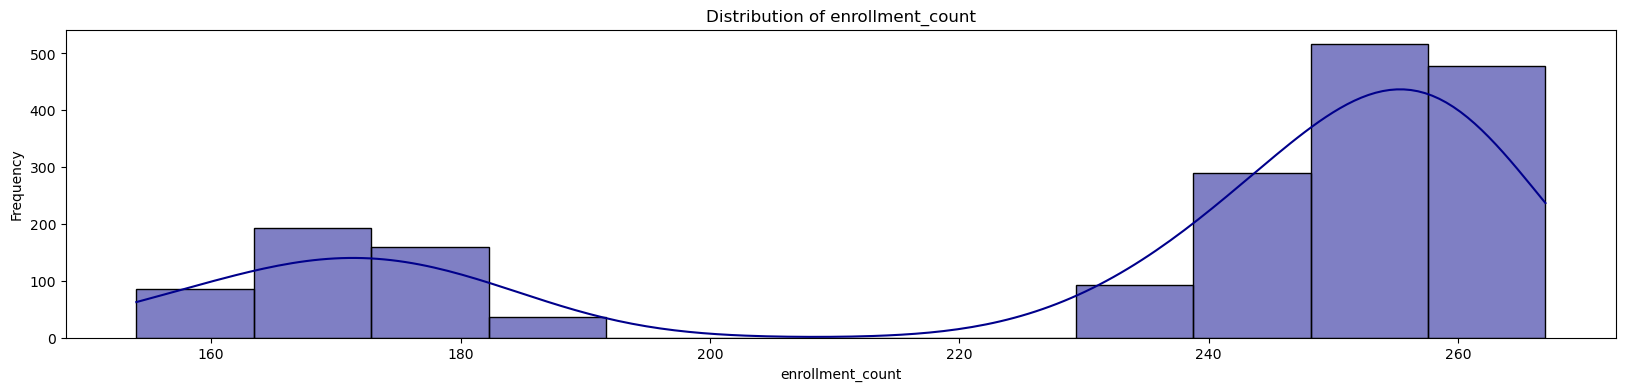

Statistics
#########################
Mean: 231.56540540540541
Median: 251.0
Mode: 261


In [5]:
def plot_dist(column, df, a, b):
    plt.figure(figsize=(a, b))
    sns.histplot(x=column, data=df, color='darkblue', kde=True)  # Create a histogram with a density curve
    plt.title(f'Distribution of {column}') 
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Call the plot_dist function to visualize the 'enrollment_count' column in the DataFrame 'df'
plot_dist('enrollment_count', df, 20, 4)


print('Statistics')
print('#' * 25)
# Calculate and print the mean, median, and mode of the 'enrollment_count' column in the DataFrame 'df'
print('Mean:', df.enrollment_count.mean())
print('Median:', df.enrollment_count.median())  
print('Mode:', df.enrollment_count.mode()[0]) 


The visual representations above illustrate the distribution of student enrollments within our courses, utilizing data from the "enrollment_count" column. The histogram unveils a bimodal pattern along the x-axis, with the most prominent peak centered around 260 enrollments. This suggests that a significant proportion of our courses attract approximately this number of students, as evident from both the mode (261) and median (251) values. However, the histogram also highlights a group of courses with notably lower enrollments, hovering around 170. Possible explanations for this disparity could encompass ineffective marketing tactics, limited interest in the course content, or even potential data entry errors. Collaborating with our business analyst team to delve deeper into the root causes of this enrollment discrepancy would be a prudent course of action.
The accompanying boxplot on the right complements this perspective by showcasing the distribution of enrollments, indicating the absence of any outliers beyond the minimum and maximum range.

# Task 3

Proportion of Online vs. Classroom Classes
############################################################
The proportion of online classes is: 74.32432432432432
The proportion of classroom classes is: 25.675675675675677


c:\Users\alexc\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexc\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexc\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


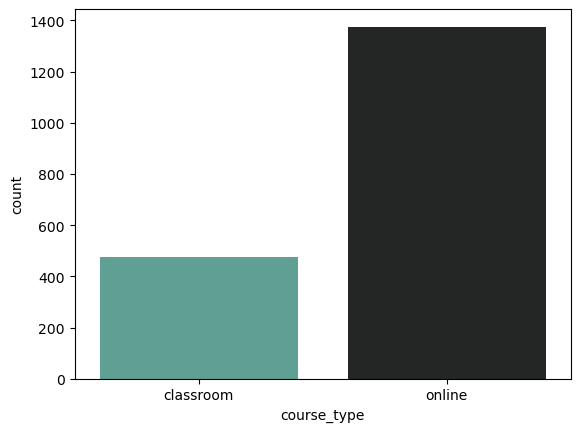

In [6]:
# Plot a countplot of 'course_type'
sns.countplot(x='course_type', data=df, palette='dark:#5A9_r')

# Calculate the number of 'online' courses.
online = df[df.course_type=='online'].shape[0]

# Calculate the number of 'classroom' courses
classroom = df.shape[0] - online

# Calculate the proportion of online courses
proportion_of_online = (online / (online + classroom)) * 100

# Calculate the proportion of classroom courses
proportion_of_classroom = 100 - proportion_of_online

print('Proportion of Online vs. Classroom Classes')
print('#' * 60)
print('The proportion of online classes is:', proportion_of_online)
print('The proportion of classroom classes is:', proportion_of_classroom)


Based on the available data, it is evident that online courses have the highest number of observations. As visually represented in the graph, there is an uneven distribution of observations between the two course types. Online courses constitute approximately 74% of the total, while classroom courses account for only 26%. This disparity in representation has the potential to introduce bias into our analytical results by giving online courses greater influence. Although there are techniques available to rebalance the data, we have chosen to maintain the existing distribution for the purposes of this analysis. In future investigations, it would be prudent to examine how this imbalance might affect our findings and consider implementing corrective measures.

In summary, it is evident that online courses are the predominant category within our dataset. This pattern could reflect the growing popularity of online education in the academic sphere. Nevertheless, we must exercise caution when drawing conclusions from the data due to this observed imbalance.

# Task 4

Statistics
######################################################################
The mean of enrollment_count for classroom is: 170.42947368421054
The minimum of enrollment_count for classroom is: 154
The maximum of enrollment_count for classroom is: 190
######################################################################
The mean of enrollment_count for online is: 252.68509090909092
The minimum of enrollment_count for online is: 231
The maximum of enrollment_count for online is: 267


c:\Users\alexc\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexc\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexc\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


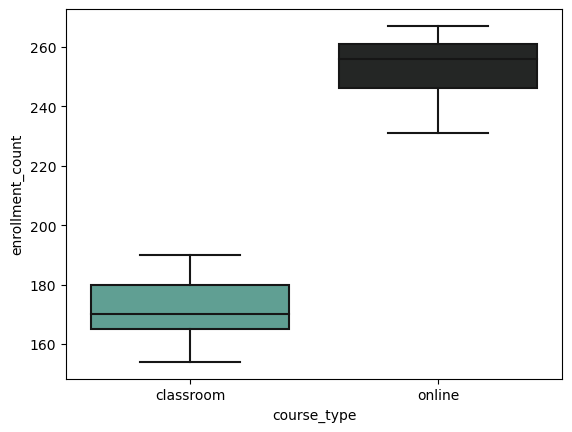

In [7]:
sns.boxplot(x='course_type', y='enrollment_count', data=df, palette='dark:#5A9_r')

print('Statistics')
print('#'*70)
# Calculate and display statistics for 'classroom' course type.
print('The mean of enrollment_count for classroom is:', df.loc[df.course_type=='classroom', 'enrollment_count'].mean())
print('The minimum of enrollment_count for classroom is:', df.loc[df.course_type=='classroom', 'enrollment_count'].min())
print('The maximum of enrollment_count for classroom is:', df.loc[df.course_type=='classroom', 'enrollment_count'].max())
print('#' * 70)
# Calculate and display statistics for 'online' course type.
print('The mean of enrollment_count for online is:', df.loc[df.course_type=='online', 'enrollment_count'].mean())
print('The minimum of enrollment_count for online is:', df.loc[df.course_type=='online', 'enrollment_count'].min())
print('The maximum of enrollment_count for online is:', df.loc[df.course_type=='online', 'enrollment_count'].max())


The chart above illustrates a noticeable contrast in enrollment figures between online and in-person classroom courses. Online courses not only surpass classroom courses in terms of availability (as demonstrated in the previous task), but they also tend to draw a larger number of students. On average, online courses enroll approximately 253 students, whereas classroom courses have an average enrollment closer to 170 students. Notably, the range of enrollment values for each course type does not overlap, underscoring the clear distinction in enrollment counts between the two course formats.

One plausible explanation for this trend is the inherent physical constraints associated with traditional classroom courses, which can limit the number of students who can enroll. Conversely, online courses, free from such limitations, can accommodate a greater number of students, leading to higher enrollment numbers. Additionally, this trend may be influenced by evolving societal norms and advancements in technology, which have made online learning more accessible and increasingly popular.

In summary, the data strongly suggests that the type of course plays a significant role in determining enrollment figures, with online courses generally attracting higher enrollments compared to their classroom counterparts.

# Task 5
This machine learning problem is classified as a regression problem due to the nature of its output variable, which is real or continuous in nature. In regression tasks, the goal is to predict a continuous numeric value, as opposed to classification tasks where the objective is to assign data points to predefined categories or classes.

# Task 6

c:\Users\alexc\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexc\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Actual Values vs Predicted Values')

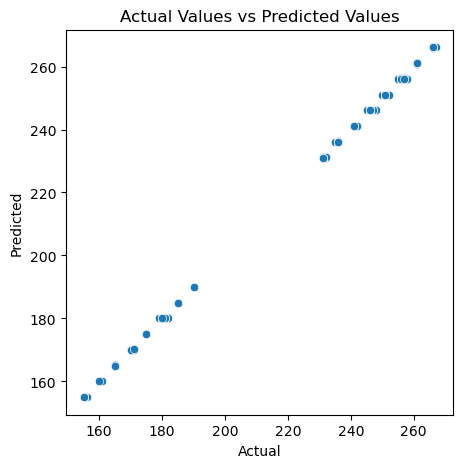

In [8]:
# Initialize a OneHotEncoder for categorical data encoding
encoder = OneHotEncoder()

# Encode the 'course_type' column and create a DataFrame with the encoded values
encoded_course_type = encoder.fit_transform(df[['course_type']])
encoded_course_type_df = pd.DataFrame(encoded_course_type.toarray(), columns=encoder.get_feature_names_out(['course_type']))

# Encode the 'pre_requirement' column and create a DataFrame with the encoded values
encoded_pre_requirement = encoder.fit_transform(df[['pre_requirement']])
encoded_pre_requirement_df = pd.DataFrame(encoded_pre_requirement.toarray(), columns=encoder.get_feature_names_out(['pre_requirement']))

# Encode the 'department' column and create a DataFrame with the encoded values
encoded_department = encoder.fit_transform(df[['department']])
encoded_department_df = pd.DataFrame(encoded_department.toarray(), columns=encoder.get_feature_names_out(['department']))

# Concatenate the original DataFrame with the encoded categorical columns
df_encoded = pd.concat([df, encoded_course_type_df, encoded_pre_requirement_df, encoded_department_df], axis=1)

# Define the feature matrix (X) and the target variable (y)
X = df_encoded.drop(['course_type', 'pre_requirement', 'department', 'enrollment_count', 'course_id'], axis=1)
y = df_encoded.enrollment_count

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a Linear Regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_preds = model.predict(X_test)

# Create a dictionary with actual and predicted values
data = {'Actual': y_test, 'Predicted': y_preds}

# Create a DataFrame from the dictionary
df_2= pd.DataFrame(data)

plt.figure(figsize=(5,5))
sns.scatterplot(x='Actual', y='Predicted', data=df_2)
plt.title('Actual Values vs Predicted Values')

For this particular dataset, our initial approach involved employing a **Linear Regression** model as a baseline. The primary objective of this model was to make predictions for the target variable, which, in this case, is the enrollment_count. It leveraged the information contained within the other variables present in our dataset.

The visualization presented above showcases a comparison between the actual enrollment counts and the predictions generated by our Linear Regression model. At first glance, the model demonstrates a remarkable level of accuracy, which is further supported by the substantial R-squared value of 0.999 and the remarkably low RMSE metric score.

# Task 7

c:\Users\alexc\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alexc\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alexc\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\alexc\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_paramete

Text(0.5, 1.0, 'Actual Values vs Predicted Values')

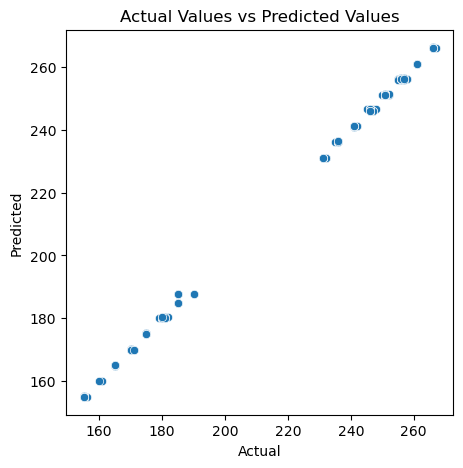

In [9]:
# Create an instance of a DecisionTreeRegressor model
model = DecisionTreeRegressor()

# Define a dictionary of hyperparameters to search over using RandomizedSearchCV
params = {
    'max_depth': np.arange(1, 11, 1),  # Vary the depth of the decision tree from 1 to 10
    'min_samples_split': np.arange(1, 21, 1),  # Vary the minimum samples required to split a node
    'min_samples_leaf': np.arange(1, 21, 1)  # Vary the minimum samples required for a leaf node
}

# Create a RandomizedSearchCV object with 5-fold cross-validation, parallel execution, and a fixed random seed
cv = RandomizedSearchCV(model, param_distributions=params, cv=5, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV to the training data to find the best hyperparameters
cv.fit(X_train, y_train)

# Retrieve the best hyperparameters from the search
best_parameters = cv.best_params_

# Create a new DecisionTreeRegressor with the best hyperparameters
model = DecisionTreeRegressor(max_depth=best_parameters['max_depth'],
                              min_samples_split=best_parameters['min_samples_split'],
                              min_samples_leaf=best_parameters['min_samples_leaf'])

# Fit the model to the training data with the best hyperparameters
model.fit(X_train, y_train)

# Make predictions on the test data using the trained model
y_predictions = model.predict(X_test)

# Create a dictionary with actual and predicted values
data = {'Actual': y_test, 'Predicted': y_predictions}

# Create a DataFrame from the dictionary
df_3= pd.DataFrame(data)

plt.figure(figsize=(5,5))
sns.scatterplot(x='Actual', y='Predicted', data=df_3)
plt.title('Actual Values vs Predicted Values')

The provided code successfully implements a Decision Tree Regressor model with hyperparameter tuning using RandomizedSearchCV. It systematically explores the hyperparameter space to find the best combination of hyperparameters, ultimately resulting in an optimized model for predicting target values. The scatter plot at the end of the code allows for a visual assessment of the model's predictive performance. The effectiveness of the model can be further evaluated using appropriate regression metrics.

# Task 8
In summary, linear regression was chosen for its simplicity and interpretability, while decision tree regression was chosen for its ability to capture non-linear relationships, handle categorical data, and offer flexible hyperparameter tuning. These choices were based on the specific characteristics of the enrollment prediction task and the data.

# Task 9

Linear Regression Metrics
######################################################################
The R-squared score on the training data: 0.9998905246482619
The mean absolute error on the test data: 0.1355706764349577
The mean squared error on the test data: 0.09375677835704498
The root mean squared error on the test data: 0.30619728665852836

Decision Tree Regression Metrics
######################################################################
The R-squared score on the training data: 0.9998905246482619
The mean absolute error on the test data: 0.1777341261487911
The mean squared error on the test data: 0.20276286295581084
The root mean squared error on the test data: 0.45029197522919595


c:\Users\alexc\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexc\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexc\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexc\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

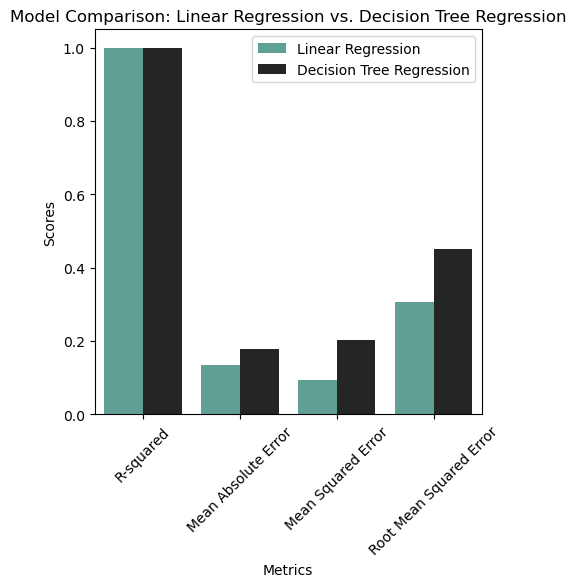

In [10]:
# Metrics evaluation
print('Linear Regression Metrics')
print('#'*70)
print('The R-squared score on the training data:',model.score(X_train, y_train))
print('The mean absolute error on the test data:',mean_absolute_error(y_test, y_preds))
print('The mean squared error on the test data:',mean_squared_error(y_test, y_preds))
print('The root mean squared error on the test data:',np.sqrt(mean_squared_error(y_test, y_preds)))
print('\nDecision Tree Regression Metrics')
print('#'*70)
print('The R-squared score on the training data:',model.score(X_train, y_train))
print('The mean absolute error on the test data:',mean_absolute_error(y_test, y_predictions))
print('The mean squared error on the test data:',mean_squared_error(y_test, y_predictions))
print('The root mean squared error on the test data:',np.sqrt(mean_squared_error(y_test, y_predictions)))

# Define the metrics and model names
metrics = ['R-squared', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']
linear_regression_scores = [model.score(X_train, y_train), mean_absolute_error(y_test, y_preds),
                            mean_squared_error(y_test, y_preds), np.sqrt(mean_squared_error(y_test, y_preds))]
decision_tree_scores = [model.score(X_train, y_train), mean_absolute_error(y_test, y_predictions),
                        mean_squared_error(y_test, y_predictions), np.sqrt(mean_squared_error(y_test, y_predictions))]


data = pd.DataFrame({'Metric': metrics * 2,
                     'Score': linear_regression_scores + decision_tree_scores,
                     'Model': ['Linear Regression'] * len(metrics) + ['Decision Tree Regression'] * len(metrics)})

# Create a bar plot using Seaborn
plt.figure(figsize=(5, 5))
ax = sns.barplot(x="Metric", y="Score", hue="Model", data=data, palette='dark:#5A9_r')
plt.title('Model Comparison: Linear Regression vs. Decision Tree Regression')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

# Task 10
Based on the provided metrics, the Linear Regression model outperforms the Decision Tree Regression model in terms of Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error on the test data. However, both models have nearly identical R-squared scores on the training data, indicating that they fit the training data equally well. The choice between these models may depend on other factors such as interpretability and model complexity.